In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=4, n_informative=4, n_targets=1, noise=50, random_state=7)

In [120]:
df = pd.DataFrame({'feature1':X[:,0], 'feature2':X[:,1], 'feature3':X[:,2], 'feature4':X[:,3], 'target':y})
df.sample(5)

,feature1,feature2,feature3,feature4,target
89,1.304835,-0.021524,0.622629,-0.151398,58.055500
36,-0.830127,2.181960,-0.426844,0.785552,131.290985
42,0.255705,0.529894,0.255428,0.149295,1.065137
114,0.156844,1.426721,0.486335,-0.569472,17.222384
192,1.171001,-1.641433,0.596141,-0.054190,12.239481


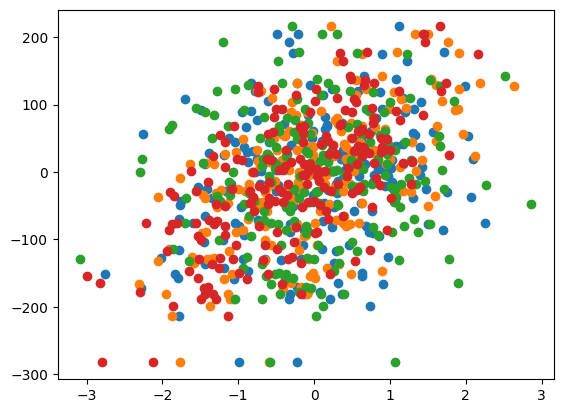

In [138]:
for i in range(4):
    plt.scatter(X[:,i], y)

## Simple Linear Regression from scrach

In [148]:
# multiple linear regression using gradient decent
class MultiLinearRegression:
    def __init__(self, lr=0.05, epochs=100):
        self.__lr = lr
        self.__epochs = epochs

    def fit(self, X, y):
        m = X.shape[1]
        self.__weights = np.zeros(m)
        self.__bias = 0

        # updating parameters using gradient decent
        self.__gradient_decent(X, y)

    def __gradient_decent(self, X, y):
        n = X.shape[0]
        for _ in range(self.__epochs):
            y_pred = np.dot(X, self.__weights) + self.__bias
    
            # gradients
            dw = (1/n) * np.dot(X.T, (y_pred - y))
            db = (1/n) * np.sum(y_pred - y)
    
            # update
            self.__weights -= self.__lr * dw
            self.__bias -= self.__lr * db

    def predict(self, x):
        return np.dot(x, self.__weights) + self.__bias

    def get_parameters(self):
        return self.__weights, self.__bias
    

    def evaluate(self, y_true, y_pred):
        print("Mean Absolute Error =\t", self.__mae(y_true, y_pred))
        print("Mean Squared Error =\t", self.__mse(y_true, y_pred))
        print("Root Mean Squared Error =", self.__rmse(y_true, y_pred))
        print("R Squared Error =\t", self.__r2(y_true, y_pred))

    # mean absolute error
    def __mae(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += abs(y_true[i] - y_pred[i])
            return err / len(y_true)

    # mean square error
    def __mse(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += (y_true[i] - y_pred[i]) ** 2
            return err / len(y_true)

    # root mean square error
    def __rmse(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += (y_true[i] - y_pred[i]) ** 2
            return np.sqrt(err / len(y_true))

    # R2 score
    def __r2(self, y_true, y_pred):
        ssr = ((y_true - y_pred)** 2).sum()
        ssm = ((y_true - y_true.mean()) ** 2).sum()
        return 1 - ssr/ssm

In [149]:
xTrain, xTest = X[:150], X[150:]
yTrain, yTest = y[:150], y[150:]

In [150]:
model = MultiLinearRegression(0.1, 500)
model.fit(xTrain, yTrain)

In [151]:
model.predict([1.304835, -0.021524, 0.622629, -0.151398])

32.28144231159584

In [152]:
model.predict(xTest)

array([  78.37463022,   50.46222449,   22.71112933,   66.25918767,
       -172.23690509,   71.97562114,    6.27343182,  -13.23558358,
        -62.38467191,    7.91062155,   79.38946146,   38.9196049 ,
         52.61723586,  -70.10393153, -161.86581199,  -30.32903275,
        -10.97354688,   10.29474871,  100.1190714 ,  -42.22219931,
        -44.60929709,  131.67575799,  -93.60538814,    2.31637106,
         64.27640387,   31.46769416,  -58.11519208,  -69.29023098,
         -9.24468661,   21.56483465,   32.4762899 , -100.21221026,
        -82.65605217, -137.90923866,   59.89577383,   34.79364117,
         92.11342252,  -68.77381056,  -44.31937064,   55.26574861,
        -44.18076123,   -2.58275981,  -54.86775099,  -77.75081427,
         11.15439143,  -77.78248696,  -99.2874992 ,  -64.13963252,
         81.17818692, -235.06104534])

In [153]:
model.evaluate(yTest, model.predict(xTest))

Mean Absolute Error =	 36.82232204580163
Mean Squared Error =	 2216.4856445045834
Root Mean Squared Error = 47.07956716564611
R Squared Error =	 0.7134218473815843


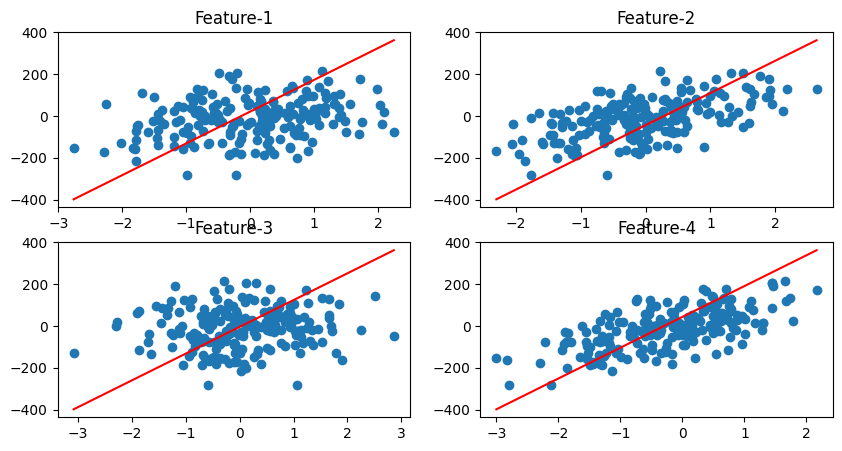

In [161]:
plt.figure(figsize=(10,5))
a1, a2 = [], []
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(f"Feature-{i+1}")
    plt.scatter(X[:,i], y)
    a1.append(X[:, i].min())
    a2.append(X[:, i].max())
y1 = model.predict(a1)
y2 = model.predict(a2)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot([a1[i],a2[i]], [y1,y2], color='red')

## Comparing with scikit-learn

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lr = LinearRegression()
lr.fit(xTrain, yTrain)

LinearRegression()

In [157]:
print(f"Sklearn model:\t\tm = {lr.coef_}\t b = {lr.intercept_}")
print(f"Model from Scrach:\tm = {model.get_parameters()[0]}\t b = {model.get_parameters()[1]}")

Sklearn model:		m = [25.51624866 55.41897652  5.19314697 63.54431624]	 b = 6.566864522379872
Model from Scrach:	m = [25.51624866 55.41897652  5.19314697 63.54431624]	 b = 6.566864522379853


In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Sklearn Model:")
print("Mean Absolute Error =\t", mean_absolute_error(yTest, model.predict(xTest)))
print("Mean Squared Error =\t", mean_squared_error(yTest, model.predict(xTest)))
print("Root Mean Squared Error =", mean_squared_error(yTest, model.predict(xTest)))
print("R Squared Error =\t", r2_score(yTest, model.predict(xTest)))

Sklearn Model:
Mean Absolute Error =	 36.82232204580162
Mean Squared Error =	 2216.4856445045843
Root Mean Squared Error = 2216.4856445045843
R Squared Error =	 0.7134218473815843


In [160]:
print("Model from Scrach:")
model.evaluate(yTest, model.predict(xTest))

Model from Scrach:
Mean Absolute Error =	 36.82232204580163
Mean Squared Error =	 2216.4856445045834
Root Mean Squared Error = 47.07956716564611
R Squared Error =	 0.7134218473815843
